### 사분위 값

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sample = np.array([1,3,4,7,10,19,20,22,25])

In [4]:
print("1사분위: ", np.quantile(sample, 0.25))
print("2사분위: ", np.quantile(sample, 0.5))
print("3사분위: ", np.quantile(sample, 0.75))

1사분위:  4.0
2사분위:  10.0
3사분위:  20.0


* 1사분위와 3사분위 값이 이상한데?

* [사분위값](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)

* 사분위 값은 method 옵션을 어떻게 정하느냐에 따라 값이 달라질 수 있다. 
* default는 `linear`!

* $n$ = 벡터 길이
* $q$ = $q$% 지점
* method = linear
    * $\alpha = 1$, $\beta = 1$

* $q = 0.25$라면

\begin{equation}
i+g = q(n-1)+1 = \frac{25}{100}n+0.75
\end{equation}

* $q = 0.5$라면

\begin{equation}
i+g = q(n-1)+1 = \frac{50}{100}n+0.5
\end{equation}

* $q = 0.75$라면

\begin{equation}
i+g = q(n-1)+1 = \frac{75}{100}n+0.25
\end{equation}

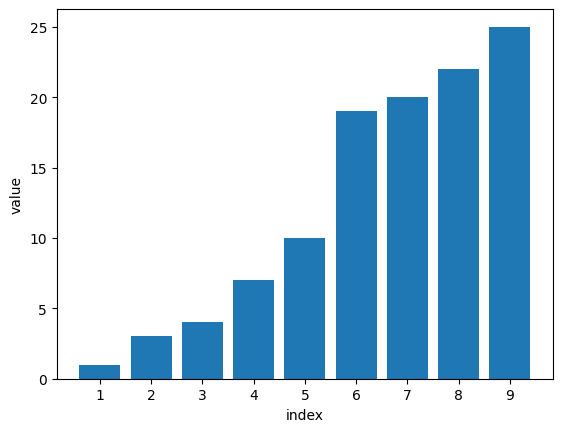

In [5]:
fig, ax = plt.subplots()
ax.bar(x = [str(i) for i in range(1, len(sample)+1)],
       height = sample)
ax.set(xlabel = "index",
       ylabel = "value");

* `method = "midpoint"`

In [6]:
sample = np.array([1,3,4,7,10,19,20,22,25,30])

In [7]:
print("1사분위: ", np.quantile(sample, 0.25, method = "midpoint"))
print("2사분위: ", np.quantile(sample, 0.5, method = "midpoint"))
print("3사분위: ", np.quantile(sample, 0.75, method = "midpoint"))

1사분위:  5.5
2사분위:  14.5
3사분위:  21.0


In [8]:
sample_01 = np.array([1,3,4,7,10,19,20,22,25,30,35])

In [9]:
print("1사분위: ", np.quantile(sample_01, 0.25))
print("2사분위: ", np.quantile(sample_01, 0.5))
print("3사분위: ", np.quantile(sample_01, 0.75))

1사분위:  5.5
2사분위:  19.0
3사분위:  23.5


In [10]:
sample_02 = np.array([1,1,3,3,7,19,20,20,25,30])

In [11]:
print("1사분위: ", np.quantile(sample_02, 0.25))
print("2사분위: ", np.quantile(sample_02, 0.5))
print("3사분위: ", np.quantile(sample_02, 0.75))

1사분위:  3.0
2사분위:  13.0
3사분위:  20.0


### IQR 계산하기
    
$$
x = [x_1, x_2, x_3, x_4 … x_i , x_{i+g}, x_n]
$$``

- $q_1 = 0.25$, $q_2 = 0.5$,$q_3 = 0.75$ 이고 여기서  $n$ = 데이터의 총 개수
    
$$
i + g = q(n - \alpha - \beta + 1) + \alpha
$$

- 선형일때의 $\alpha=1, \beta=1$ 이다.
    
$$
i+g = q(n - 1) + 1
$$
    
또한 $IQR = Q_3 - Q_1$

- ex) 만약 $x = [1, 2, 4, 6, 8, 12,13,15,26,37,69,85]$ 일 때


- $q_1 = 0.25$ 
    - $i+g = 0.25 ( 12 - 1 ) + 1$
    - $i+g = 3.75$ =  $3 + 0.75$
    - 선형 보간 시 ⇒ $Q_1 =4 + (6 - 4) *0.75 = 5.5$
- $q_2 = 0.5$
    - $i+g = 0.5 ( 12 - 1 ) + 1$
    - $i+g = 6.5$ =  $6 + 0.5$
    - 선형 보간 시 ⇒ $Q_2 = 12 + (13 - 12) * 0.5 = 12.5$
- $q_3 = 0.75$
    - $i+g = 0.75 ( 12 - 1 ) + 1$
    - $i+g = 9.25$ = $9+ 0.25$
    - 선형 보간 시 ⇒ $Q_3 = 26 + (37 - 26) * 0.25 = 28.75$
- $IQR = 23.25$
    - 최소 허용치 = $Q_1 - 1.5 \times IQR = 5.5 - 1.5 \times 23.75 = -29.375$
    - 최대 허용치 =  $Q_3 + 1.5 \times IQR = 28.75 + 1.5 \times 23.75 = 64.375$

```text
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

1. 수염의 길이는 데이터의 범위 안에서 정해진다.
2. q_1 - IQR 보다 큰 가장 가까운 데이터 안의 값으로 최저 한계선이 정해진다.
3. q_3 + IQR 보다 작안 가장 가까운 데이터 안의 값으로 최대 한계선이 정해진다.
    - (min / max value if there are no outliers)

[0.   0.   0.15 0.22 0.28 0.3  0.34 1.49 1.53 1.64]


array([0.  , 0.34, 1.53, 1.49, 1.64, 0.15, 0.28, 0.3 , 0.  , 0.22])

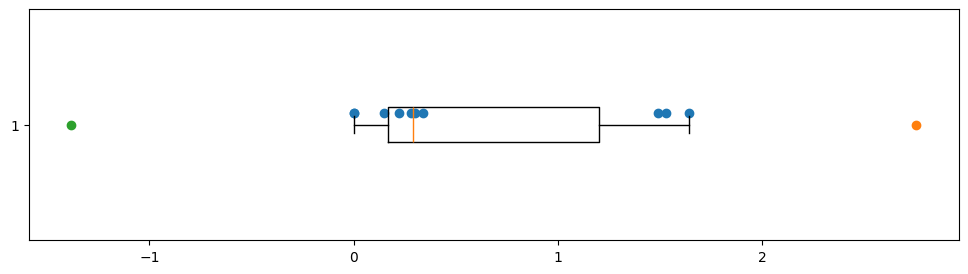

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def boxplot_checking(x):
    x = np.sort(x)
    print(x)
    q_1 = np.quantile(x, 0.25) 
    q_2 = np.quantile(x, 0.50) 
    q_3 = np.quantile(x, 0.75) 

    iqr = q_3 - q_1
    min_, max_  = (q_1 - 1.5 * iqr, q_3 + 1.5 * iqr)

    fig, ax = plt.subplots(1,1, figsize=(12, 3))

    ax.boxplot(x, vert=False, whis=1.5 );
    ax.scatter([x],[1.05]*len(x))
# plt.scatter([seven_num_sum],[1.1]*len(seven_num_sum))
    ax.scatter([max_],[1])
    ax.scatter([min_],[1])


x = np.round(np.abs(np.random.randn(10) ** 2),2)
boxplot_checking(x)
x

### boxplots

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
peng = sns.load_dataset("penguins")
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


/tmp/ipykernel_8624/3824726361.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  peng[target_feature].fillna(20, inplace=True)
/tmp/ipykernel_8624/3824726361.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,


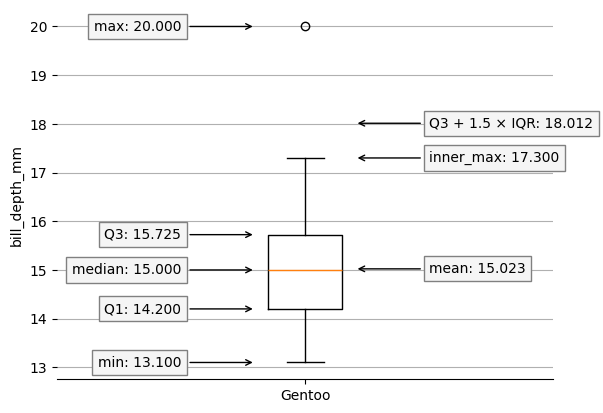

In [15]:
fig, ax = plt.subplots()

target_species = "Gentoo"
target_feature = "bill_depth_mm"

peng[target_feature].fillna(20, inplace=True)

data = peng[peng["species"] == target_species][target_feature]

ax.boxplot(data, 
           labels=[target_species])
ax.set(
    ylabel=target_feature,
)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.grid(axis="y");


annotation_options = {
    "va": "center",
    "arrowprops": {"arrowstyle": "->"},
    "bbox": {"fc": "whitesmoke", "ec": "gray"},
}
quantiles = np.quantile(data, [0, 0.25, 0.5, 0.75, 1])
for name, q in zip(["min", "Q1", "median", "Q3", "max"], quantiles):
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(0.9, q),
        xytext=(0.75, q),
        **annotation_options,
        ha="right",
    )

iqr = quantiles[3] - quantiles[1]
for name, q in [
    ["mean", data.mean().item()],
    ["Q3 + 1.5 × IQR", quantiles[3] + 1.5 * iqr],
    ["Q1 - 1.5 × IQR", quantiles[1] - 1.5 * iqr],
    ["inner_max", data[data < (quantiles[3] + 1.5 * iqr)].max()]
]:
    ax.annotate(
        f"{name}: {q:.3f}",
        xy=(1.1, q),
        xytext=(1.25, q),
        **annotation_options,
        ha="left",
    )
pass